In [1]:
!conda install -c conda-forge folium=0.5.0 --yes 
!conda install -c conda-forge geopy --yes 


Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [99]:
from geopy.geocoders import Nominatim 
import folium 
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#import types
#from botocore.client import Config
#import ibm_boto3

import types
import pandas as pd



print('Libraries imported.')

Libraries imported.


# Data Import

## Montreal

In [100]:
Montreal_Boroughs_Neighborhoods = pd.read_excel('Montreal_BN.xlsx')
Montreal_Boroughs_Neighborhoods.head()

,City,Borough,Neighborhood
0,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Côte-des-Neiges
1,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Snowdon/Queen Mary
2,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Village Monkland
3,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Notre-Dame-de-Grâce
4,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Upper Lachine


In [101]:
for index, row in Montreal_Boroughs_Neighborhoods.iterrows():
    #address = ('Montreal, QC')
    address = (Montreal_Boroughs_Neighborhoods.loc[index,'Neighborhood'] + ' ' + Montreal_Boroughs_Neighborhoods.loc[index,'Borough'] + ', ' + 'Montreal, QC')
    #print(address)
   

    try:
        geolocator = Nominatim(user_agent="mtl")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        #print(index)
        #print(address, latitude, longitude)
        Montreal_Boroughs_Neighborhoods.at[index,'Latitude'] = latitude
        Montreal_Boroughs_Neighborhoods.at[index,'Longitude'] = longitude
    except Exception as inst:
        print(address, inst)



Golden Square Mile Ville-Marie, Montreal, QC 'NoneType' object has no attribute 'latitude'


In [102]:
Montreal_Boroughs_Neighborhoods

,City,Borough,Neighborhood,Latitude,Longitude
0,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Côte-des-Neiges,45.496651,-73.623489
1,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Snowdon/Queen Mary,45.486858,-73.627409
2,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Village Monkland,45.478973,-73.619732
3,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Notre-Dame-de-Grâce,45.477156,-73.616918
4,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Upper Lachine,45.464244,-73.620768
5,Montreal,Le Plateau-Mont-Royal,Parc La Fontaine,45.526348,-73.568889
6,Montreal,Le Plateau-Mont-Royal,Mile-End,45.525083,-73.600208
7,Montreal,Le Plateau-Mont-Royal,Parc Laurier,45.531493,-73.585172
8,Montreal,Le Plateau-Mont-Royal,Milton Parc,45.508890,-73.576546
9,Montreal,Le Plateau-Mont-Royal,De Lorimier,45.534454,-73.569892


In [103]:
#manual input for some neighborhoods

#vieux montreal
Montreal_Boroughs_Neighborhoods.at[32,'Latitude']= 45.506185
Montreal_Boroughs_Neighborhoods.at[32,'Longitude']= -73.552501

#golden square mile
Montreal_Boroughs_Neighborhoods.at[35,'Latitude']= 45.500720
Montreal_Boroughs_Neighborhoods.at[35,'Longitude']= -73.576759

#Monkland Village
Montreal_Boroughs_Neighborhoods.at[2,'Latitude']= 45.473579
Montreal_Boroughs_Neighborhoods.at[2,'Longitude']= -73.624739

#Cote St-Paul
Montreal_Boroughs_Neighborhoods.at[16,'Latitude']= 45.458284
Montreal_Boroughs_Neighborhoods.at[16,'Longitude']= -73.588441

#Cité Jardin
Montreal_Boroughs_Neighborhoods.at[24,'Latitude']= 45.570745
Montreal_Boroughs_Neighborhoods.at[24,'Longitude']= -73.562063


#Hochelaga-Maisonneuve
Montreal_Boroughs_Neighborhoods.at[19,'Latitude']= 45.548629
Montreal_Boroughs_Neighborhoods.at[19,'Longitude']= -73.542369

#Le Village
Montreal_Boroughs_Neighborhoods.at[31,'Latitude']= 45.518436
Montreal_Boroughs_Neighborhoods.at[31,'Longitude']= -73.557311


#Parc La Fontaine
Montreal_Boroughs_Neighborhoods.at[5,'Latitude']= 45.528877
Montreal_Boroughs_Neighborhoods.at[5,'Longitude']= -73.571184

#Ville-Émard
Montreal_Boroughs_Neighborhoods.at[17,'Latitude']= 45.454925
Montreal_Boroughs_Neighborhoods.at[17,'Longitude']= -73.598675

#Angus
Montreal_Boroughs_Neighborhoods.at[22,'Latitude']= 45.546780
Montreal_Boroughs_Neighborhoods.at[2,'Longitude']= -73.563897


Montreal_Boroughs_Neighborhoods.drop(Montreal_Boroughs_Neighborhoods.index[[30]])

,City,Borough,Neighborhood,Latitude,Longitude
0,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Côte-des-Neiges,45.496651,-73.623489
1,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Snowdon/Queen Mary,45.486858,-73.627409
2,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Village Monkland,45.473579,-73.563897
3,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Notre-Dame-de-Grâce,45.477156,-73.616918
4,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Upper Lachine,45.464244,-73.620768
5,Montreal,Le Plateau-Mont-Royal,Parc La Fontaine,45.528877,-73.571184
6,Montreal,Le Plateau-Mont-Royal,Mile-End,45.525083,-73.600208
7,Montreal,Le Plateau-Mont-Royal,Parc Laurier,45.531493,-73.585172
8,Montreal,Le Plateau-Mont-Royal,Milton Parc,45.508890,-73.576546
9,Montreal,Le Plateau-Mont-Royal,De Lorimier,45.534454,-73.569892


# Vancouver

In [104]:
Vancouver_Boroughs_Neighborhoods  = pd.read_excel('Vancouver_BN.xlsx')
Vancouver_Boroughs_Neighborhoods.head()

,City,Borough,Neighborhood
0,Vancouver,Downtown,Coal Harbour
1,Vancouver,Downtown,Chinatown
2,Vancouver,Downtown,Downtown Eastside
3,Vancouver,Downtown,English Bay
4,Vancouver,Downtown,Downtown


In [105]:
for index, row in Vancouver_Boroughs_Neighborhoods.iterrows():
    address = (Vancouver_Boroughs_Neighborhoods.loc[index,'Neighborhood'] + ' Vancouver, BC')
    try:
        geolocator = Nominatim(user_agent="van_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        Vancouver_Boroughs_Neighborhoods.at[index,'Latitude'] = latitude
        Vancouver_Boroughs_Neighborhoods.at[index,'Longitude'] = longitude
    except Exception as inst:
        print(address, inst)

Vancouver_Boroughs_Neighborhoods

Greektown Vancouver, BC 'NoneType' object has no attribute 'latitude'


,City,Borough,Neighborhood,Latitude,Longitude
0,Vancouver,Downtown,Coal Harbour,49.290375,-123.129281
1,Vancouver,Downtown,Chinatown,49.279981,-123.104089
2,Vancouver,Downtown,Downtown Eastside,49.282399,-123.099458
3,Vancouver,Downtown,English Bay,49.286374,-123.164344
4,Vancouver,Downtown,Downtown,49.285998,-123.127358
5,Vancouver,Downtown,Gastown,49.283657,-123.106236
6,Vancouver,Downtown,Granville Mall,49.284344,-123.115309
7,Vancouver,Downtown,International Village,49.280220,-123.106696
8,Vancouver,Downtown,Japantown,49.283187,-123.095227
9,Vancouver,Downtown,Robson,49.282696,-123.120681


In [106]:
#manual input for Coal Harbour
Vancouver_Boroughs_Neighborhoods.at[0,'Latitude']= 49.289719
Vancouver_Boroughs_Neighborhoods.at[0,'Longitude']= -123.124657

#manual input for Greektown
Vancouver_Boroughs_Neighborhoods.at[37,'Latitude']= 49.264222
Vancouver_Boroughs_Neighborhoods.at[37,'Longitude']= -123.175944

#manual input for Fairview
Vancouver_Boroughs_Neighborhoods.at[16,'Latitude']= 49.263489
Vancouver_Boroughs_Neighborhoods.at[16,'Longitude']= -123.131395


#manual input for English bay
Vancouver_Boroughs_Neighborhoods.at[3,'Latitude']= 49.287306
Vancouver_Boroughs_Neighborhoods.at[3,'Longitude']= -123.142238

#manual input for Marpole
Vancouver_Boroughs_Neighborhoods.at[20,'Latitude']= 49.211044
Vancouver_Boroughs_Neighborhoods.at[20,'Longitude']= -123.140427


# Draw neighborhood maps


In [107]:
# create map of Mont using latitude and longitude values
map_Montreal = folium.Map(location=[45.567428,-73.659098], zoom_start=11)

# add markers to map
for lat, lng, Borough, Neighborhood in zip(Montreal_Boroughs_Neighborhoods['Latitude'], Montreal_Boroughs_Neighborhoods['Longitude'], Montreal_Boroughs_Neighborhoods['Borough'], Montreal_Boroughs_Neighborhoods['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Montreal)  
    
map_Montreal

In [108]:
# create map of Vancouver using latitude and longitude values
map_Vancouver = folium.Map(location=[49.290375, -123.129281], zoom_start=11)

# add markers to map
for lat, lng, Borough, Neighborhood in zip(Vancouver_Boroughs_Neighborhoods['Latitude'], Vancouver_Boroughs_Neighborhoods['Longitude'], Vancouver_Boroughs_Neighborhoods['Borough'], Vancouver_Boroughs_Neighborhoods['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Vancouver)  
    
map_Vancouver

# Analysis

#### Define Foursquare credentials

In [1]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


#### Let's create a function to find out each venues in a neighborhood¶


In [110]:
def getHoodVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
        LIMIT = 80 # limit of number of venues returned by Foursquare API
        radius = 500 # define radius    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',                   'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### run the above function on the two cities to gather venues info

In [111]:
Montreal_venues = getHoodVenues(names=Montreal_Boroughs_Neighborhoods['Neighborhood'],
                                   latitudes=Montreal_Boroughs_Neighborhoods['Latitude'],
                                   longitudes=Montreal_Boroughs_Neighborhoods['Longitude']
                                  )
Vancouver_venues = getHoodVenues(names=Vancouver_Boroughs_Neighborhoods['Neighborhood'],
                                   latitudes=Vancouver_Boroughs_Neighborhoods['Latitude'],
                                   longitudes=Vancouver_Boroughs_Neighborhoods['Longitude']
                                  )

In [112]:
print("Montreal venues: ", Montreal_venues['Neighborhood'].shape)

print("Vancouver venues: ", Vancouver_venues['Neighborhood'].shape)

Montreal_venues.head()

Montreal venues:  (1452,)
Vancouver venues:  (1634,)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Côte-des-Neiges,45.496651,-73.623489,Saint-Houblon,45.497535,-73.622939,Bar
1,Côte-des-Neiges,45.496651,-73.623489,Bistro Olivieri,45.496134,-73.620748,French Restaurant
2,Côte-des-Neiges,45.496651,-73.623489,Les Fruits et Légumes Trottier,45.496259,-73.621741,Farmers Market
3,Côte-des-Neiges,45.496651,-73.623489,Caravane Café,45.497374,-73.622721,Café
4,Côte-des-Neiges,45.496651,-73.623489,La Caverne,45.495546,-73.620538,Russian Restaurant


#### Let's merge the data from the three cities to compare them¶


In [127]:

Twocitieshoods = Montreal_Boroughs_Neighborhoods

Twocitieshoods = Twocitieshoods.append(Vancouver_Boroughs_Neighborhoods)


Twocitieshoods.head()

,City,Borough,Neighborhood,Latitude,Longitude
0,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Côte-des-Neiges,45.496651,-73.623489
1,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Snowdon/Queen Mary,45.486858,-73.627409
2,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Village Monkland,45.473579,-73.563897
3,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Notre-Dame-de-Grâce,45.477156,-73.616918
4,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Upper Lachine,45.464244,-73.620768


In [128]:
Twocitiesvenues = Montreal_venues
Twocitiesvenues = Twocitiesvenues.append(Vancouver_venues)

# Let's re-categorize the venues to have less and obtain better results
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Accessories Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['American Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Art Gallery'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Arts & Crafts Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Asian Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Athletics & Sports'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Australian Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Auto Workshop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Automotive Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['BBQ Joint'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Bagel Shop'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Bakery'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Bank'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Bar'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Beach'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Beer Bar'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Beer Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Belgian Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Bike Rental / Bike Share'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Bistro'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Boat or Ferry'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Bookstore'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Boutique'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Bowling Alley'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Boxing Gym'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Brazilian Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Breakfast Spot'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Brewery'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Bridal Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Bubble Tea Shop'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Burger Joint'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Burrito Place'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Bus Line'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Bus Station'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Bus Stop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Business Service'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Butcher'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Café'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Cajun / Creole Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Canal'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Candy Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Caribbean Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Cheese Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Chinese Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Chocolate Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Church'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Circus'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Clothing Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Cocktail Bar'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Coffee Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Comedy Club'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Concert Hall'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Construction & Landscaping'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Convenience Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Cosmetics Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Creperie'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Cuban Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Deli / Bodega'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Department Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Dessert Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Dim Sum Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Diner'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Discount Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Dog Run'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Donut Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Dumpling Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Electronics Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['English Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Ethiopian Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Falafel Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Farmers Market'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Fast Food Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Filipino Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Fish & Chips Shop'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Fish Market'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Flower Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Food'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Food & Drink Shop'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Food Court'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Food Truck'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['French Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Fried Chicken Joint'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Frozen Yogurt Shop'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Furniture / Home Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Gaming Cafe'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Garden'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Gas Station'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Gastropub'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['German Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Gift Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Gourmet Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Greek Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Grocery Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Gun Range'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Gun Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Gym'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Gym / Fitness Center'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Gym Pool'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Harbor / Marina'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Hardware Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Hawaiian Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Health Food Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Historic Site'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Hobby Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Hockey Arena'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Hookah Bar'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Hostel'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Hotel'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Hotel Bar'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Hotpot Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Ice Cream Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Indian Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Indie Movie Theater'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Indonesian Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Irish Pub'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Italian Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Japanese Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Jewelry Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Juice Bar'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Karaoke Bar'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Korean Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Latin American Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Leather Goods Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Lebanese Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Lingerie Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Liquor Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Lounge'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Mac & Cheese Joint'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Malay Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Marijuana Dispensary'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Market'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Massage Studio'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Medical Center'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Mediterranean Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(["Men's Store"], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Metro Station'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Mexican Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Middle Eastern Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Miscellaneous Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Modern European Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Mongolian Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Moroccan Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Movie Theater'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Museum'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Music Venue'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Nail Salon'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['New American Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Nightclub'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Noodle House'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Office'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Optical Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Outdoor Sculpture'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Paper / Office Supplies Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Park'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Performing Arts Venue'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Pet Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Pharmacy'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Pizza Place'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Playground'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Plaza'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Poke Place'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Pool'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Portuguese Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Pub'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Racetrack'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Ramen Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Record Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Recording Studio'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Recreation Center'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Rental Car Location'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Rock Club'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Roof Deck'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Salon / Barbershop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Salvadoran Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Sandwich Place'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Sausage Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Scandinavian Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Scenic Lookout'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Science Museum'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Sculpture Garden'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Seafood Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Shabu-Shabu Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Shanghai Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Shipping Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Shoe Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Shopping Mall'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Skate Park'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Skating Rink'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Smoke Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Snack Place'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Soccer Field'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['South American Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Spa'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Spanish Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Speakeasy'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Sporting Goods Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Sports Bar'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Stationery Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Steakhouse'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Supermarket'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Sushi Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Szechuan Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Taco Place'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Tapas Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Tea Room'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Tech Startup'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Tennis Court'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Thai Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Theater'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Theme Park'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Theme Park Ride / Attraction'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Thrift / Vintage Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Tibetan Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Tiki Bar'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Toy / Game Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Trade School'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Trail'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Turkish Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Vegetarian / Vegan Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Video Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Vietnamese Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Water Park'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Whisky Bar'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Wine Bar'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Wine Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(["Women's Store"], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Yoga Studio'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Zoo'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Board Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Boat Rental'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Botanical Garden'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Cambodian Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Camera Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Comfort Food Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Cupcake Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Dance Studio'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Event Space'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Gay Bar'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Health & Beauty Service'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Heliport'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Himalayan Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['History Museum'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Hot Dog Joint'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Japanese Curry Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Library'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Martial Arts School'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Mobile Phone Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['North Indian Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Persian Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Pie Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Pool Hall'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Poutine Place'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Public Art'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Residential Building (Apartment / Condo)'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Russian Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Salad Place'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['South Indian Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Swiss Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Tex-Mex Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Train Station'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Warehouse Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Wings Joint'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Afghan Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['African Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Airport Terminal'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Amphitheater'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Antique Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Arcade'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Arepa Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Art Museum'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Auto Garage'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Baseball Field'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Baseball Stadium'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Bed & Breakfast'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Beer Garden'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Bike Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Bridge'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Building'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Burmese Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Cafeteria'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Cantonese Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Climbing Gym'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['College Gym'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['College Rec Center'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Community Center'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Dive Bar'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Eastern European Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Empanada Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Escape Room'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Fair'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Financial or Legal Service'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Football Stadium'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Fruit & Vegetable Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Gluten-free Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Golf Course'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Herbs & Spices Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Home Service'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['IT Services'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Inn'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Insurance Office'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Intersection'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Jazz Club'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Jewish Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Kitchen Supply Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Lake'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Laundromat'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Light Rail Station'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Molecular Gastronomy Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Motorcycle Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Opera House'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Other Great Outdoors'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Outdoor Supply Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Pastry Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Peruvian Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Pier'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Planetarium'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Polish Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Print Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Real Estate Office'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Rock Climbing Spot'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Shopping Plaza'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Soccer Stadium'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Social Club'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Soup Place'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Southern / Soul Food Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Sri Lankan Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Stadium'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Tattoo Parlor'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Tennis Stadium'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Track'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Strip Club'], 'Nightlife Spot')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Basketball Court'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Track'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Track'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['ATM'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Adult Boutique'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Rest Area'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['College Science Building'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Music Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Pet Café'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Pet Café'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['University'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Tunnel'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Tailor Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Student Center'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Mattress Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Waterfall'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Ski Area'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['College Theater'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['General Entertainment'], 'Arts & Entertainment')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Kids Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Photography Studio'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Baby Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['School'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Pop-Up Shop'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['College Bookstore'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Carpet Store'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Post Office'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['General Travel'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Bike Trail'], 'Outdoors & Recreation')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Kebab Restaurant'], 'Food')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Dry Cleaner'], 'Shop & Service')
Twocitiesvenues['Venue Category'] = Twocitiesvenues['Venue Category'].replace(['Comic Shop'], 'Shop & Service')

print('There are {} uniques categories.'.format(len(Twocitiesvenues['Venue Category'].unique())))
Twocitiesvenues.head()

There are 6 uniques categories.


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Côte-des-Neiges,45.496651,-73.623489,Saint-Houblon,45.497535,-73.622939,Nightlife Spot
1,Côte-des-Neiges,45.496651,-73.623489,Bistro Olivieri,45.496134,-73.620748,Food
2,Côte-des-Neiges,45.496651,-73.623489,Les Fruits et Légumes Trottier,45.496259,-73.621741,Shop & Service
3,Côte-des-Neiges,45.496651,-73.623489,Caravane Café,45.497374,-73.622721,Shop & Service
4,Côte-des-Neiges,45.496651,-73.623489,La Caverne,45.495546,-73.620538,Food


#### Use one-hot encoding to display venues


In [129]:
# one hot encoding
Twocitiesvenues_onehot = pd.get_dummies(Twocitiesvenues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Twocitiesvenues_onehot['Neighborhood'] = Twocitiesvenues['Neighborhood'] 

# move neighborhood column to the first column
#fixed_columns = [Threecitiesvenues_onehot.columns[-22]] + list(Threecitiesvenues_onehot.columns[:-1])
#Threecitiesvenues_onehot = Threecitiesvenues_onehot[fixed_columns]


col_name="Neighborhood"
first_col = Twocitiesvenues_onehot.pop(col_name)
Twocitiesvenues_onehot.insert(0, col_name, first_col)

Twocitiesvenues_onehot.head()

,Neighborhood,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Shop & Service
0,Côte-des-Neiges,0,0,1,0,0
1,Côte-des-Neiges,0,1,0,0,0
2,Côte-des-Neiges,0,0,0,0,1
3,Côte-des-Neiges,0,0,0,0,1
4,Côte-des-Neiges,0,1,0,0,0


In [130]:
Twocitiesvenues_grouped = Twocitiesvenues_onehot.groupby('Neighborhood').sum().reset_index()
Twocitiesvenues_grouped = Twocitiesvenues_grouped 
Twocitiesvenues_grouped.head()

,Neighborhood,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Shop & Service
0,Angus,0,2,0,3,8
1,Arbutus Ridge,0,1,1,0,3
2,Atwater,1,35,5,4,33
3,Centre,0,0,0,3,1
4,Champlain Heights,0,1,1,2,2


#### We can find out the top venue categories per neighborhood


In [131]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [132]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Twocitiesvenues_sorted = pd.DataFrame(columns=columns)
Twocitiesvenues_sorted['Neighborhood'] = Twocitiesvenues_grouped['Neighborhood']

for ind in np.arange(Twocitiesvenues_grouped.shape[0]):
    Twocitiesvenues_sorted.iloc[ind, 1:] = return_most_common_venues(Twocitiesvenues_grouped.iloc[ind, :], num_top_venues)

Twocitiesvenues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Angus,Shop & Service,Outdoors & Recreation,Food,Nightlife Spot,Arts & Entertainment
1,Arbutus Ridge,Shop & Service,Nightlife Spot,Food,Outdoors & Recreation,Arts & Entertainment
2,Atwater,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
3,Centre,Outdoors & Recreation,Shop & Service,Nightlife Spot,Food,Arts & Entertainment
4,Champlain Heights,Shop & Service,Outdoors & Recreation,Nightlife Spot,Food,Arts & Entertainment


In [133]:
Twocitiesvenues_sorted1 = Twocitiesvenues_sorted

#Twocitiesvenues_sorted1.drop("Neighborhood",1)
Twocitiesvenues_sorted1 = Twocitiesvenues_sorted1.replace("Shop & Service", 0)
Twocitiesvenues_sorted1 = Twocitiesvenues_sorted1.replace("Food", 1)
Twocitiesvenues_sorted1 = Twocitiesvenues_sorted1.replace("Outdoors & Recreation", 2)
Twocitiesvenues_sorted1 = Twocitiesvenues_sorted1.replace("Nightlife Spot", 3)
Twocitiesvenues_sorted1 = Twocitiesvenues_sorted1.replace("Arts & Entertainment", 4)
Twocitiesvenues_sorted1 = Twocitiesvenues_sorted1.drop('Neighborhood',1)  
Twocitiesvenues_sorted1

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,0,2,1,3,4
1,0,3,1,2,4
2,1,0,3,2,4
3,2,0,3,1,4
4,0,2,3,1,4
5,1,0,3,2,4
6,0,2,1,3,4
7,1,0,2,4,3
8,2,0,3,1,4
9,0,1,2,3,4


#### We can now cluster the neighborhoods to see which one from which city fit together¶


In [134]:
# set number of clusters
kclusters = 9
Twocitiesvenues_clustering = Twocitiesvenues_grouped.drop('Neighborhood', 1)
Twocitiesvenues_clustering = Twocitiesvenues_clustering * 1


# run k-means clustering
#kmeans = KMeans(n_clusters=kclusters,random_state=0).fit(Twocitiesvenues_clustering)
kmeans = KMeans(n_clusters=kclusters,random_state=0).fit(Twocitiesvenues_sorted1)
kmeans.labels_


array([6, 6, 0, 8, 5, 0, 6, 4, 8, 2, 1, 8, 0, 2, 2, 0, 2, 1, 4, 5, 0, 7,
       2, 2, 3, 1, 2, 7, 0, 1, 2, 1, 1, 1, 2, 0, 0, 1, 0, 0, 3, 0, 1, 1,
       4, 2, 1, 1, 1, 0, 0, 2, 3, 3, 1, 3, 7, 4, 5, 4, 6, 1, 2, 2, 1, 8,
       1, 6, 1, 2, 1, 0, 7, 7, 6, 6, 7, 0, 0, 2, 4])

#### Let's put back the neighborhood and their respective city in the dataframe


In [174]:
# add clustering labels
Twocitiesvenues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Twocitiesvenues_merged = Twocitieshoods

Twocitiesvenues_merged = Twocitiesvenues_merged.join(Twocitiesvenues_sorted.set_index('Neighborhood'), on='Neighborhood')

Twocitiesvenues_merged.head()

ValueError: cannot insert Cluster Labels, already exists

#### Let's examine the clusters:¶


In [175]:
Twocitiesvenues_merged.loc[Twocitiesvenues_merged['Cluster Labels'] == 0, Twocitiesvenues_merged.columns[[0] + [1] + [2] + list(range(5, Twocitiesvenues_merged.shape[1]))]]

,City,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Côte-des-Neiges,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
6,Montreal,Le Plateau-Mont-Royal,Mile-End,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
10,Montreal,Mont-Royal,Le Plateau,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
13,Montreal,Le Sud-Ouest,Atwater,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
14,Montreal,Le Sud-Ouest,Pointe Saint-Charles,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
21,Montreal,Rosemont–La Petite-Patrie,Petite-Italie,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
25,Montreal,Verdun,Wellington-de-l'Église,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
31,Montreal,Ville-Marie,Le Village,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
1,Vancouver,Downtown,Chinatown,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
2,Vancouver,Downtown,Downtown Eastside,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment


### create map of Vancouver' Cluster 0 neighborhoods using latitude and longitude values

In [176]:
Twocitiesvenues_merged.loc[Twocitiesvenues_merged['Cluster Labels'] == 0, Twocitiesvenues_merged.columns[[0] + [1] + [2] + list(range(5, Twocitiesvenues_merged.shape[1]))]]

,City,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Côte-des-Neiges,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
6,Montreal,Le Plateau-Mont-Royal,Mile-End,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
10,Montreal,Mont-Royal,Le Plateau,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
13,Montreal,Le Sud-Ouest,Atwater,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
14,Montreal,Le Sud-Ouest,Pointe Saint-Charles,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
21,Montreal,Rosemont–La Petite-Patrie,Petite-Italie,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
25,Montreal,Verdun,Wellington-de-l'Église,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
31,Montreal,Ville-Marie,Le Village,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
1,Vancouver,Downtown,Chinatown,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
2,Vancouver,Downtown,Downtown Eastside,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment


In [177]:
mapVan = Twocitiesvenues_merged.loc[Twocitiesvenues_merged['Cluster Labels'] == 0]
mapVan = mapVan.loc[mapVan['City'] == "Vancouver"]
mapVan

,City,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Vancouver,Downtown,Chinatown,49.279981,-123.104089,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
2,Vancouver,Downtown,Downtown Eastside,49.282399,-123.099458,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
5,Vancouver,Downtown,Gastown,49.283657,-123.106236,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
7,Vancouver,Downtown,International Village,49.280220,-123.106696,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
11,Vancouver,Downtown,Victory Square,49.282325,-123.110130,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
12,Vancouver,Downtown,West End,49.284131,-123.131795,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
20,Vancouver,West Side,Marpole,49.211044,-123.140427,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
28,Vancouver,East Side,Mount Pleasant,49.263330,-123.096588,0,Food,Shop & Service,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment


In [182]:
# create map of Vancouver' Cluster 2 neighborhoods using latitude and longitude values
map_Vancouver = folium.Map(location=[49.290375, -123.129281], zoom_start=12)

# add markers to map
for lat, lng, Borough, Neighborhood in zip(mapVan['Latitude'], mapVan['Longitude'], mapVan['Borough'], mapVan['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Vancouver)  
    
map_Vancouver

In [173]:
Twocitiesvenues_merged.loc[Twocitiesvenues_merged['Cluster Labels'] == 1, Twocitiesvenues_merged.columns[[0] + [1] + [2] + list(range(5, Twocitiesvenues_merged.shape[1]))]]

,City,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Snowdon/Queen Mary,1,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment
3,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Notre-Dame-de-Grâce,1,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment
7,Montreal,Le Plateau-Mont-Royal,Parc Laurier,1,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment
11,Montreal,Le Sud-Ouest,Griffintown,1,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment
12,Montreal,Le Sud-Ouest,Petite-Bourgogne,1,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment
26,Montreal,Verdun,L’Île-des-Sœurs,1,Outdoors & Recreation,Shop & Service,Food,Nightlife Spot,Arts & Entertainment
39,Montreal,Villeray–Saint-Michel–Parc-Extension,Parc-Extension,1,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment
3,Vancouver,Downtown,English Bay,1,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment
8,Vancouver,Downtown,Japantown,1,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment
18,Vancouver,West Side,Kerrisdale,1,Food,Shop & Service,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment


In [154]:
Twocitiesvenues_merged.loc[Twocitiesvenues_merged['Cluster Labels'] == 2, Twocitiesvenues_merged.columns[[0] + [1] + [2] + list(range(5, Twocitiesvenues_merged.shape[1]))]]

,City,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Upper Lachine,2,Shop & Service,Food,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment
5,Montreal,Le Plateau-Mont-Royal,Parc La Fontaine,2,Shop & Service,Food,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment
9,Montreal,Le Plateau-Mont-Royal,De Lorimier,2,Shop & Service,Food,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment
18,Montreal,Mercier–Hochelaga-Maisonneuve,Préfontaine,2,Shop & Service,Food,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment
23,Montreal,Rosemont–La Petite-Patrie,La Petite-Patrie,2,Shop & Service,Food,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment
0,Vancouver,Downtown,Coal Harbour,2,Shop & Service,Food,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment
4,Vancouver,Downtown,Downtown,2,Shop & Service,Food,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment
6,Vancouver,Downtown,Granville Mall,2,Shop & Service,Food,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment
15,Vancouver,West Side,Dunbar–Southlands,2,Shop & Service,Food,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment
23,Vancouver,West Side,South Cambie,2,Shop & Service,Food,Outdoors & Recreation,Nightlife Spot,Arts & Entertainment


In [155]:
Twocitiesvenues_merged.loc[Twocitiesvenues_merged['Cluster Labels'] == 3, Twocitiesvenues_merged.columns[[0] + [1] + [2] + list(range(5, Twocitiesvenues_merged.shape[1]))]]

,City,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
8,Montreal,Le Plateau-Mont-Royal,Milton Parc,3,Food,Shop & Service,Nightlife Spot,Arts & Entertainment,Outdoors & Recreation
28,Montreal,Ville-Marie,Quartier Latin,3,Food,Shop & Service,Nightlife Spot,Arts & Entertainment,Outdoors & Recreation
29,Montreal,Ville-Marie,Quartier chinois,3,Food,Shop & Service,Arts & Entertainment,Nightlife Spot,Outdoors & Recreation
30,Vancouver,East Side,Riley Park,3,Food,Shop & Service,Nightlife Spot,Arts & Entertainment,Outdoors & Recreation
37,Vancouver,Other,Greektown,3,Food,Shop & Service,Nightlife Spot,Arts & Entertainment,Outdoors & Recreation


In [156]:
Twocitiesvenues_merged.loc[Twocitiesvenues_merged['Cluster Labels'] == 4, Twocitiesvenues_merged.columns[[0] + [1] + [2] + list(range(5, Twocitiesvenues_merged.shape[1]))]]

,City,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
15,Montreal,Le Sud-Ouest,Saint-Henri,4,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,Nightlife Spot
20,Montreal,Outremont,Outremont,4,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,Nightlife Spot
27,Montreal,Ville-Marie,Sainte-Marie,4,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,Nightlife Spot
33,Montreal,Ville-Marie,Cité du multimédia,4,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,Nightlife Spot
13,Vancouver,Downtown,Yaletown,4,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,Nightlife Spot
16,Vancouver,West Side,Fairview,4,Food,Shop & Service,Outdoors & Recreation,Arts & Entertainment,Nightlife Spot


In [157]:
Twocitiesvenues_merged.loc[Twocitiesvenues_merged['Cluster Labels'] == 5, Twocitiesvenues_merged.columns[[0] + [1] + [2] + list(range(5, Twocitiesvenues_merged.shape[1]))]]

,City,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
38,Montreal,Villeray–Saint-Michel–Parc-Extension,Saint-Michel,5,Shop & Service,Outdoors & Recreation,Nightlife Spot,Food,Arts & Entertainment
17,Vancouver,West Side,False Creek,5,Food,Outdoors & Recreation,Arts & Entertainment,Shop & Service,Nightlife Spot
34,Vancouver,Other,Champlain Heights,5,Shop & Service,Outdoors & Recreation,Nightlife Spot,Food,Arts & Entertainment


In [158]:
Twocitiesvenues_merged.loc[Twocitiesvenues_merged['Cluster Labels'] == 6, Twocitiesvenues_merged.columns[[0] + [1] + [2] + list(range(5, Twocitiesvenues_merged.shape[1]))]]

,City,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Montreal,Côte-des-Neiges–Notre-Dame-de-Grâce,Village Monkland,6,Shop & Service,Outdoors & Recreation,Food,Nightlife Spot,Arts & Entertainment
17,Montreal,Le Sud-Ouest,Ville-Émard,6,Shop & Service,Outdoors & Recreation,Food,Arts & Entertainment,Nightlife Spot
22,Montreal,Rosemont–La Petite-Patrie,Angus,6,Shop & Service,Outdoors & Recreation,Food,Nightlife Spot,Arts & Entertainment
24,Montreal,Rosemont–La Petite-Patrie,Cité Jardin,6,Shop & Service,Outdoors & Recreation,Food,Nightlife Spot,Arts & Entertainment
14,Vancouver,West Side,Arbutus Ridge,6,Shop & Service,Nightlife Spot,Food,Outdoors & Recreation,Arts & Entertainment
22,Vancouver,West Side,Shaughnessy,6,Shop & Service,Outdoors & Recreation,Food,Nightlife Spot,Arts & Entertainment
32,Vancouver,East Side,Sunset,6,Shop & Service,Outdoors & Recreation,Food,Nightlife Spot,Arts & Entertainment


In [159]:
Twocitiesvenues_merged.loc[Twocitiesvenues_merged['Cluster Labels'] == 7, Twocitiesvenues_merged.columns[[0] + [1] + [2] + list(range(5, Twocitiesvenues_merged.shape[1]))]]

,City,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
19,Montreal,Mercier–Hochelaga-Maisonneuve,Hochelaga-Maisonneuve,7,Shop & Service,Food,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
32,Montreal,Ville-Marie,Vieux-Montréal,7,Shop & Service,Food,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
35,Montreal,Ville-Marie,Golden Square Mile,7,Shop & Service,Food,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
36,Montreal,Shaughnessy,Village,7,Shop & Service,Food,Arts & Entertainment,Outdoors & Recreation,Nightlife Spot
37,Montreal,Villeray–Saint-Michel–Parc-Extension,Villeray,7,Shop & Service,Food,Nightlife Spot,Outdoors & Recreation,Arts & Entertainment
9,Vancouver,Downtown,Robson,7,Shop & Service,Food,Arts & Entertainment,Outdoors & Recreation,Nightlife Spot


In [160]:
Twocitiesvenues_merged.loc[Twocitiesvenues_merged['Cluster Labels'] == 8, Twocitiesvenues_merged.columns[[0] + [1] + [2] + list(range(5, Twocitiesvenues_merged.shape[1]))]]

,City,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
16,Montreal,Le Sud-Ouest,Côte-Saint-Paul,8,Outdoors & Recreation,Shop & Service,Nightlife Spot,Food,Arts & Entertainment
30,Montreal,Sud,Centre,8,Outdoors & Recreation,Shop & Service,Nightlife Spot,Food,Arts & Entertainment
34,Montreal,Ville-Marie,Cité-du-Havre,8,Outdoors & Recreation,Shop & Service,Nightlife Spot,Food,Arts & Entertainment
10,Vancouver,Downtown,Stanley Park,8,Outdoors & Recreation,Shop & Service,Nightlife Spot,Food,Arts & Entertainment


## Let's look at spider plots of each cluster

In [161]:
Twocitiesvenues_grouped.insert(0, 'Clusters', kmeans.labels_)
Twocitiesvenues_grouped.head()

,Clusters,Neighborhood,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Shop & Service
0,6,Angus,0,2,0,3,8
1,6,Arbutus Ridge,0,1,1,0,3
2,0,Atwater,1,35,5,4,33
3,8,Centre,0,0,0,3,1
4,5,Champlain Heights,0,1,1,2,2


In [162]:
var0 = Twocitiesvenues_grouped.loc[Twocitiesvenues_grouped['Clusters'] == 0].mean(axis = 0)  
df0 = pd.DataFrame(var0)
df0.columns = ['0']

var1 = Twocitiesvenues_grouped.loc[Twocitiesvenues_grouped['Clusters'] == 1].mean(axis = 0)  
df1 = pd.DataFrame(var1)
df1.columns = ['1']

var2 = Twocitiesvenues_grouped.loc[Twocitiesvenues_grouped['Clusters'] == 2].mean(axis = 0)  
df2 = pd.DataFrame(var2)
df2.columns = ['2']

var3 = Twocitiesvenues_grouped.loc[Twocitiesvenues_grouped['Clusters'] == 3].mean(axis = 0)  
df3 = pd.DataFrame(var3)
df3.columns = ['3']

var4 = Twocitiesvenues_grouped.loc[Twocitiesvenues_grouped['Clusters'] == 4].mean(axis = 0)  
df4 = pd.DataFrame(var4)
df4.columns = ['4']

var5 = Twocitiesvenues_grouped.loc[Twocitiesvenues_grouped['Clusters'] == 5].mean(axis = 0)  
df5 = pd.DataFrame(var5)
df5.columns = ['5']

var6 = Twocitiesvenues_grouped.loc[Twocitiesvenues_grouped['Clusters'] == 6].mean(axis = 0)  
df6 = pd.DataFrame(var6)
df6.columns = ['6']

var7 = Twocitiesvenues_grouped.loc[Twocitiesvenues_grouped['Clusters'] == 7].mean(axis = 0)  
df7 = pd.DataFrame(var7)
df7.columns = ['7']

var8 = Twocitiesvenues_grouped.loc[Twocitiesvenues_grouped['Clusters'] == 8].mean(axis = 0)  
df8 = pd.DataFrame(var8)
df8.columns = ['8']

var9 = Twocitiesvenues_grouped.loc[Twocitiesvenues_grouped['Clusters'] == 9].mean(axis = 0)  
df9 = pd.DataFrame(var9)
df9.columns = ['9']

dftotal = df0
dftotal['1'] = df1
dftotal['2'] = df2
dftotal['3'] = df3
dftotal['4'] = df4
dftotal['5'] = df5
dftotal['6'] = df6
dftotal['7'] = df7
dftotal['8'] = df8
#dftotal['9'] = df9
dftotal = dftotal.transpose() 
dftotal["Clusters"] = dftotal["Clusters"].astype("str")
dftotal

,Clusters,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Shop & Service
0,0.0,0.937500,31.500000,6.812500,2.937500,21.125000
1,1.0,0.263158,15.210526,1.210526,2.157895,9.000000
2,2.0,0.666667,13.266667,1.266667,3.400000,16.866667
3,3.0,5.600000,26.800000,7.800000,2.000000,18.600000
4,4.0,2.500000,20.666667,1.166667,5.166667,13.500000
5,5.0,1.666667,3.666667,1.333333,3.000000,3.000000
6,6.0,0.142857,1.428571,0.142857,1.571429,3.714286
7,7.0,4.000000,20.500000,4.833333,3.666667,24.833333
8,8.0,0.000000,0.000000,0.000000,3.000000,0.750000


In [167]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
    # number of variable
    categories=list(dftotal)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True, )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0,20,40], ["0","20","40"], color="grey", size=7)
    plt.ylim(0,40)
 
    # Ind1
    values=dftotal.iloc[row].drop('Clusters').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=11, color=color, y=1.1)
 

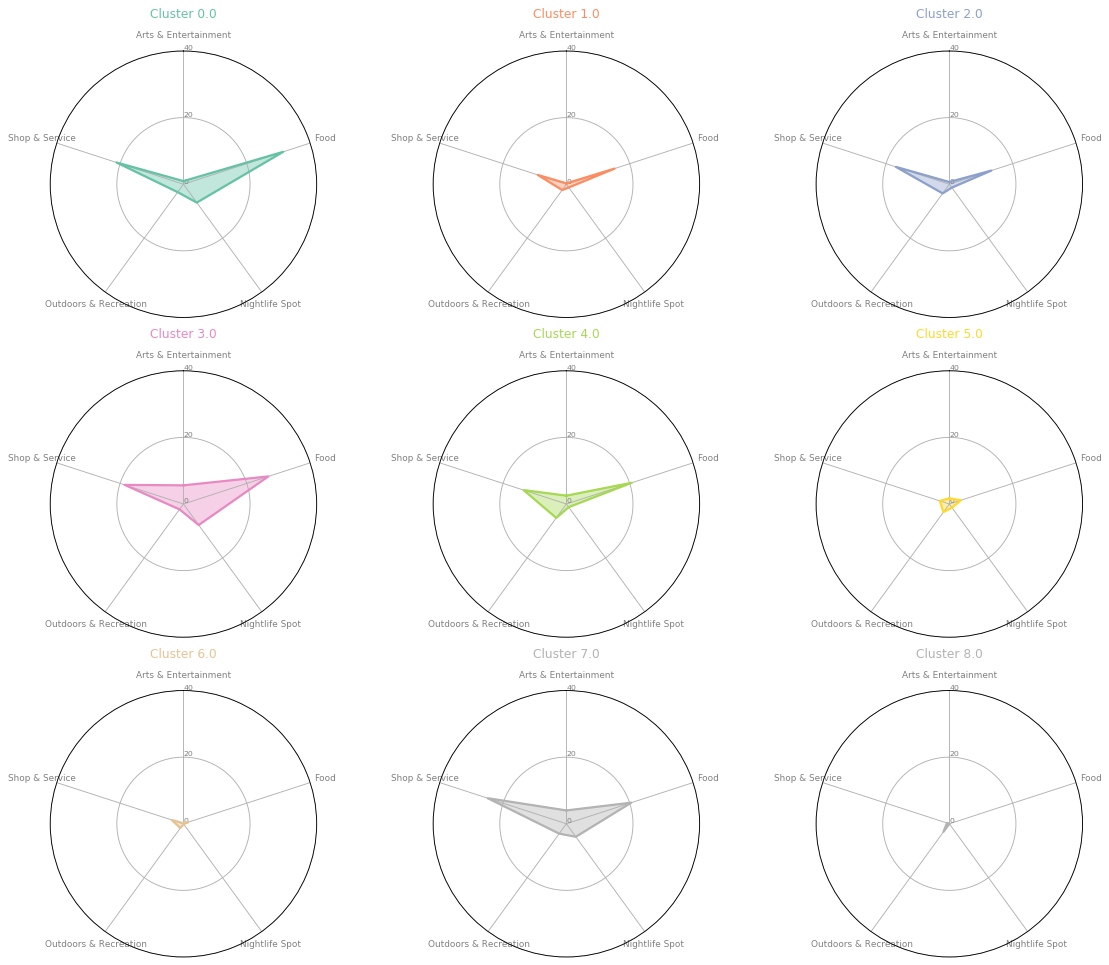

In [168]:
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=80
plt.figure(figsize=(1400/my_dpi, 1200/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(dftotal.index))
 
# Loop to plot
for row in range(0, len(dftotal.index)):
    make_spider( row=row, title='Cluster '+dftotal['Clusters'][row], color=my_palette(row))
    
plt.show(block=False)

## Content-based recommender system


Let's use a content-based recommender system by asking the user his opinion of eight Montreal neighborhoods. 
Each neighboroods is in a different cluster

Let's prepare the user input matrix

In [169]:
input0 = input("Out of the following neighborhoods: give a value of 2 to neighborhoods you would live in. A value of 1 if you are ambivalent. A value of 0 where you would not live. Village Monkland: ")
userinput = pd.DataFrame({'Village Monkland': [input0]})

#Parc La Fontaine  
input1= input("Parc La Fontaine: ")
userinput['Parc La Fontaine'] = input1

#Le Plateau 
input2= input("Le Plateau: ")
userinput['Le Plateau'] = input2

#Griffintown
input3= input("Griffintown: ")
userinput['Griffintown'] = input3

#Saint-Henri cluster
input4 = input("Saint-Henri: ")
userinput['Saint-Henri'] = input4

#Hochelaga-Maisonneuve  
input5= input("Hochelaga-Maisonneuve: ")
userinput['Hochelaga-Maisonneuve'] = input5


#L’Île-des-Sœurs 
input6 = input("L’Île-des-Sœurs: ")
userinput['L’Île-des-Sœurs'] = input6


#Quartier Latin 
input7 = input("Quartier Latin: ")
userinput["Quartier Latin"] = input7

#Saint-Michel 
input8 = input("Saint-Michel: ")
userinput['Saint-Michel'] = input8


userinput = userinput.astype(float)
userinput = userinput.T
userinput.columns = ['ratings']

userinput.to_numpy()

Out of the following neighborhoods: give a value of 2 to neighborhoods you would live in. A value of 1 if you are ambivalent. A value of 0 where you would not live. Village Monkland: 1
Parc La Fontaine: 2
Le Plateau: 2
Griffintown: 0
Saint-Henri: 2
Hochelaga-Maisonneuve: 0
L’Île-des-Sœurs: 0
Quartier Latin: 0
Saint-Michel: 0


array([[1.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.]])

# Let's prepare the Neighborhood matrix

In [184]:

Twocitiesvenues_merged1 = Twocitieshoods
Twocitiesvenues_merged1 = Twocitiesvenues_merged1.join(Twocitiesvenues_grouped.set_index('Neighborhood'), on='Neighborhood')
Twocitiesvenues_merged1 = Twocitiesvenues_merged1.drop('Latitude',1).drop('Longitude',1).drop('Borough',1).drop('City',1).drop('Clusters',1)

#Let's normalize the categories
Twocitiesvenues_merged1= Twocitiesvenues_merged1[Twocitiesvenues_merged1["Neighborhood"].isin(["Parc La Fontaine","Le Plateau","Griffintown","Quartier Latin","Hochelaga-Maisonneuve","L’Île-des-Sœurs","Saint-Michel","Hochelaga-Maisonneuve","Village Monkland","Saint-Henri"])]
#Twocitiesvenues_merged1["Sum"]= Twocitiesvenues_merged1["Arts & Entertainment"] + Twocitiesvenues_merged1["Shop & Service"] + Twocitiesvenues_merged1["Outdoors & Recreation"] + Twocitiesvenues_merged1["Nightlife Spot"] + Twocitiesvenues_merged1["Food"] 
#Twocitiesvenues_merged1["Arts & Entertainment"] = Twocitiesvenues_merged1["Arts & Entertainment"] / Twocitiesvenues_merged1["Sum"]
#Twocitiesvenues_merged1["Shop & Service"] = Twocitiesvenues_merged1["Shop & Service"] / Twocitiesvenues_merged1["Sum"]
#Twocitiesvenues_merged1["Outdoors & Recreation"] = Twocitiesvenues_merged1["Outdoors & Recreation"] / Twocitiesvenues_merged1["Sum"]
#Twocitiesvenues_merged1["Nightlife Spot"] = Twocitiesvenues_merged1["Nightlife Spot"] / Twocitiesvenues_merged1["Sum"]
#Twocitiesvenues_merged1["Food"] = Twocitiesvenues_merged1["Food"] / Twocitiesvenues_merged1["Sum"]

#Twocitiesvenues_merged1 = Twocitiesvenues_merged1.drop('Sum',1)
Twocitiesvenues_merged1=Twocitiesvenues_merged1.reset_index(drop=True)
#Twocitiesvenues_merged1 = Twocitiesvenues_merged1.T
Twocitiesvenues_merged1

,Neighborhood,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Shop & Service
0,Village Monkland,0,1,0,1,6
1,Parc La Fontaine,1,16,2,6,21
2,Le Plateau,0,45,8,1,26
3,Griffintown,0,18,3,3,8
4,Saint-Henri,2,24,0,5,15
5,Hochelaga-Maisonneuve,1,16,3,1,17
6,L’Île-des-Sœurs,0,1,0,3,1
7,Quartier Latin,8,25,16,3,17
8,Saint-Michel,0,0,0,1,3


In [185]:
Twocitiesvenues_merged1 = Twocitiesvenues_merged1.drop('Neighborhood',1)
Twocitiesvenues_merged1=Twocitiesvenues_merged1.to_numpy()
Twocitiesvenues_merged1

array([[ 0,  1,  0,  1,  6],
       [ 1, 16,  2,  6, 21],
       [ 0, 45,  8,  1, 26],
       [ 0, 18,  3,  3,  8],
       [ 2, 24,  0,  5, 15],
       [ 1, 16,  3,  1, 17],
       [ 0,  1,  0,  3,  1],
       [ 8, 25, 16,  3, 17],
       [ 0,  0,  0,  1,  3]], dtype=uint8)

### Let's prepare the user profile

we need to do a dot multiplication (Hadamard product) of the user input and the and neighborhood weighted matrix. Then we normalize the results

In [186]:
weighted_cat = np.array(userinput) * np.array(Twocitiesvenues_merged1)
weighted_cat

array([[ 0.,  1.,  0.,  1.,  6.],
       [ 2., 32.,  4., 12., 42.],
       [ 0., 90., 16.,  2., 52.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 4., 48.,  0., 10., 30.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [187]:
userprofile= pd.DataFrame(weighted_cat)
userprofile= userprofile.sum()
userprofile = pd.DataFrame(userprofile)
userprofile = userprofile.T
userprofile.columns=["Arts & Entertainment", "Food", "Nightlife Spot","Outdoors & Recreation","Shop & Service"]

userprofile

,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Shop & Service
0,6.0,171.0,20.0,25.0,130.0


In [188]:
userprofile["Sum"]= userprofile["Arts & Entertainment"] + userprofile["Food"] + userprofile["Nightlife Spot"] + userprofile["Outdoors & Recreation"]+ userprofile["Shop & Service"]  
userprofile["Arts & Entertainment"] = userprofile["Arts & Entertainment"] / userprofile["Sum"]
userprofile["Food"] = userprofile["Food"] / userprofile["Sum"]
userprofile["Nightlife Spot"] = userprofile["Nightlife Spot"] / userprofile["Sum"]
userprofile["Outdoors & Recreation"] = userprofile["Outdoors & Recreation"] / userprofile["Sum"]
userprofile["Shop & Service"] = userprofile["Shop & Service"] / userprofile["Sum"]
userprofile = userprofile.drop('Sum',1)
userprofile

,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Shop & Service
0,0.017045,0.485795,0.056818,0.071023,0.369318


### Let's find the recommendations

We need to extract Vancouver's neighborhood and their weighted characteristics

In [189]:
Vancouverhoods = Twocitieshoods
Vancouverhoods = Vancouverhoods.join(Twocitiesvenues_grouped.set_index('Neighborhood'), on='Neighborhood')
Vancouverhoods = Vancouverhoods.loc[Vancouverhoods['City'] == 'Vancouver']  
#Vancouverhoods = Vancouverhoods.drop('Latitude',1).drop('Longitude',1).drop('Borough',1).drop('Clusters',1).drop('City',1).drop('Neighborhood',1)

Vancouverhoods.head()


,City,Borough,Neighborhood,Latitude,Longitude,Clusters,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Shop & Service
0,Vancouver,Downtown,Coal Harbour,49.289719,-123.124657,2,0,12,0,5,16
1,Vancouver,Downtown,Chinatown,49.279981,-123.104089,0,2,46,9,4,19
2,Vancouver,Downtown,Downtown Eastside,49.282399,-123.099458,0,1,35,11,3,18
3,Vancouver,Downtown,English Bay,49.287306,-123.142238,1,1,32,5,5,28
4,Vancouver,Downtown,Downtown,49.285998,-123.127358,2,0,17,0,6,23


In [190]:
userprofile = userprofile.T


In [191]:
userprofile=userprofile.to_numpy()
Vancouverhoods = Vancouverhoods.to_numpy()


In [192]:
#Multiply the genres by the weights and then take the weighted average
recommendationtable = np.array(userprofile) * np.array(Vancouverhoods)
recommendationtable = pd.DataFrame(recommendationtable)
#recommendationtable.sort_values('ratings', ascending=False, inplace=True)
recommendationtable.columns=["Arts & Entertainment", "Food", "Nightlife Spot","Outdoors & Recreation","Shop & Service"]
recommendationtable["Sum"]= recommendationtable["Arts & Entertainment"] + recommendationtable["Food"] + recommendationtable["Nightlife Spot"] + recommendationtable["Outdoors & Recreation"]+ recommendationtable["Shop & Service"]  

recommendationtable

ValueError: operands could not be broadcast together with shapes (5,1) (41,11) 

In [197]:
Vancouverhoodsrecommendations = Twocitieshoods
Vancouverhoodsrecommendations = Vancouverhoodsrecommendations.join(Twocitiesvenues_grouped.set_index('Neighborhood'), on='Neighborhood')
Vancouverhoodsrecommendations = Vancouverhoodsrecommendations.loc[Vancouverhoodsrecommendations['City'] == 'Vancouver'] 

Vancouverhoodsrecommendations = Vancouverhoodsrecommendations.join(recommendationtable['Sum'])
Vancouverhoodsrecommendations = Vancouverhoodsrecommendations.sort_values('Sum', ascending=False)
Vancouverhoodsrecommendations = Vancouverhoodsrecommendations.reset_index()
Vancouverhoodsrecommendations

,index,City,Borough,Neighborhood,Latitude,Longitude,Clusters,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Sum
0,38,Vancouver,Other,South Granville,49.263472,-123.138689,2,3,34,2,4,37,30.371758
1,1,Vancouver,Downtown,Chinatown,49.279981,-123.104089,0,2,46,9,4,19,29.968300
2,6,Vancouver,Downtown,Granville Mall,49.284344,-123.115309,2,2,32,3,4,39,29.743516
3,9,Vancouver,Downtown,Robson,49.282696,-123.120681,7,5,33,2,4,36,29.311239
4,39,Vancouver,Other,South Main,49.260872,-123.113953,1,1,40,1,4,26,28.812680
5,5,Vancouver,Downtown,Gastown,49.283657,-123.106236,0,0,35,11,5,29,28.677233
6,13,Vancouver,Downtown,Yaletown,49.276322,-123.120956,4,5,40,4,9,22,28.244957
7,11,Vancouver,Downtown,Victory Square,49.282325,-123.110130,0,2,36,9,4,29,28.034582
8,7,Vancouver,Downtown,International Village,49.280220,-123.106696,0,3,37,10,5,25,27.841499
9,35,Vancouver,Other,Commercial Drive,49.273140,-123.069557,1,1,38,3,3,19,26.288184


In [198]:
mapVan1 = Vancouverhoodsrecommendations[:10]


In [199]:
# create map of Vancouver' Cluster 2 neighborhoods using latitude and longitude values
map_Vancouver = folium.Map(location=[49.290375, -123.129281], zoom_start=11)

# add markers to map
for lat, lng, Borough, Neighborhood in zip(mapVan1['Latitude'], mapVan1['Longitude'], mapVan1['Borough'], mapVan1['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Vancouver)  
    
map_Vancouver

## Neighborhoods that are in each study


In [201]:
summary_recommendations = Vancouverhoodsrecommendations[Vancouverhoodsrecommendations["Neighborhood"].isin(["Chinatown","International Village","Gastown",])]
summary_recommendations

,index,City,Borough,Neighborhood,Latitude,Longitude,Clusters,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Shop & Service,Sum
1,1,Vancouver,Downtown,Chinatown,49.279981,-123.104089,0,2,46,9,4,19,29.968300
5,5,Vancouver,Downtown,Gastown,49.283657,-123.106236,0,0,35,11,5,29,28.677233
8,7,Vancouver,Downtown,International Village,49.280220,-123.106696,0,3,37,10,5,25,27.841499


In [202]:
# create map of Vancouver' Cluster 2 neighborhoods using latitude and longitude values
map_Vancouver = folium.Map(location=[49.290375, -123.129281], zoom_start=11)

# add markers to map
for lat, lng, Borough, Neighborhood in zip(summary_recommendations['Latitude'], summary_recommendations['Longitude'], summary_recommendations['Borough'], summary_recommendations['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Vancouver)  
    
map_Vancouver